<a href="https://colab.research.google.com/github/mo-9/img_classify/blob/main/img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import os
import torch
import torchvision
import numpy as np
#import tarfile
import torch.nn as nn
import torch.nn.functional as F
#from torchvision.datasets.utils import download_url
from torchvision.datasets import CIFAR100
#from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import DataLoader

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [ ]:
project_name='image-classification-project-2021'

In [ ]:
dataset = CIFAR100(root = 'data/', download = True, transform = ToTensor())
test_ds = CIFAR100(root = 'data/', train = False, transform = ToTensor())
#train_dataset = CIFAR100(root = 'data/', download = True, transform = train_transform)
#test_dataset = CIFAR100(root = 'data/', train = False, transform = test_transform)

Files already downloaded and verified


In [ ]:
print(dataset)
print(test_ds)

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR100
    Number of datapoints: 10000
    Root location: data/
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
dataset_size = len(dataset)
test_ds_size = len(test_ds)
print('total images  in dataset:', dataset_size)
print('total images in test dataset:', test_ds_size)

total images  in dataset: 50000
total images in test dataset: 10000


In [ ]:
print('total classes:', len(dataset.classes))
print(dataset.classes)

total classes: 100
['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'wha

In [ ]:
for img, label in dataset:
  print('img.shape: ', img.shape)
  print('label: ', label)
  print()
  print('img tensor: ') 
  print(img)
  break

img.shape:  torch.Size([3, 32, 32])
label:  19

img tensor: 
tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.7647, 0.8314, 0.7137],
         [1.0000, 0.9961, 0.9961,  ..., 0.6667, 0.6314, 0.5725],
         [1.0000, 0.9961, 1.0000,  ..., 0.7412, 0.6510, 0.4745],
         ...,
         [0.5804, 0.5569, 0.5490,  ..., 0.1176, 0.2549, 0.2980],
         [0.4784, 0.4706, 0.4941,  ..., 0.0863, 0.3804, 0.5529],
         [0.3412, 0.3451, 0.3961,  ..., 0.1333, 0.4118, 0.5412]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.8039, 0.8784, 0.7608],
         [1.0000, 0.9961, 0.9961,  ..., 0.6902, 0.6588, 0.6039],
         [1.0000, 0.9961, 1.0000,  ..., 0.7804, 0.6980, 0.5216],
         ...,
         [0.7255, 0.7137, 0.7020,  ..., 0.0667, 0.2431, 0.3020],
         [0.6157, 0.6078, 0.6275,  ..., 0.0627, 0.4392, 0.6314],
         [0.4784, 0.4784, 0.5255,  ..., 0.1412, 0.5216, 0.6784]],

        [[1.0000, 1.0000, 1.0000,  ..., 0.7569, 0.8000, 0.6549],
         [1.0000, 0.9961, 0.9961,  ..., 0.5882, 0.5098, 0.4431

In [ ]:
dataset_classes_dict = dict()

for item in dataset:
    label = dataset.classes[item[1]]
    if label in dataset_classes_dict:
      dataset_classes_dict[label] += 1
    else:
      dataset_classes_dict[label] = 1

dataset_classes_dict

{'apple': 500,
 'aquarium_fish': 500,
 'baby': 500,
 'bear': 500,
 'beaver': 500,
 'bed': 500,
 'bee': 500,
 'beetle': 500,
 'bicycle': 500,
 'bottle': 500,
 'bowl': 500,
 'boy': 500,
 'bridge': 500,
 'bus': 500,
 'butterfly': 500,
 'camel': 500,
 'can': 500,
 'castle': 500,
 'caterpillar': 500,
 'cattle': 500,
 'chair': 500,
 'chimpanzee': 500,
 'clock': 500,
 'cloud': 500,
 'cockroach': 500,
 'couch': 500,
 'crab': 500,
 'crocodile': 500,
 'cup': 500,
 'dinosaur': 500,
 'dolphin': 500,
 'elephant': 500,
 'flatfish': 500,
 'forest': 500,
 'fox': 500,
 'girl': 500,
 'hamster': 500,
 'house': 500,
 'kangaroo': 500,
 'keyboard': 500,
 'lamp': 500,
 'lawn_mower': 500,
 'leopard': 500,
 'lion': 500,
 'lizard': 500,
 'lobster': 500,
 'man': 500,
 'maple_tree': 500,
 'motorcycle': 500,
 'mountain': 500,
 'mouse': 500,
 'mushroom': 500,
 'oak_tree': 500,
 'orange': 500,
 'orchid': 500,
 'otter': 500,
 'palm_tree': 500,
 'pear': 500,
 'pickup_truck': 500,
 'pine_tree': 500,
 'plain': 500,
 'pl

In [ ]:
test_classes_dict = dict()

for test_item in test_ds:
    label = test_ds.classes[test_item[1]]
    if label in test_classes_dict:
      test_classes_dict[label] += 1
    else:
      test_classes_dict[label] = 1

test_classes_dict

{'apple': 100,
 'aquarium_fish': 100,
 'baby': 100,
 'bear': 100,
 'beaver': 100,
 'bed': 100,
 'bee': 100,
 'beetle': 100,
 'bicycle': 100,
 'bottle': 100,
 'bowl': 100,
 'boy': 100,
 'bridge': 100,
 'bus': 100,
 'butterfly': 100,
 'camel': 100,
 'can': 100,
 'castle': 100,
 'caterpillar': 100,
 'cattle': 100,
 'chair': 100,
 'chimpanzee': 100,
 'clock': 100,
 'cloud': 100,
 'cockroach': 100,
 'couch': 100,
 'crab': 100,
 'crocodile': 100,
 'cup': 100,
 'dinosaur': 100,
 'dolphin': 100,
 'elephant': 100,
 'flatfish': 100,
 'forest': 100,
 'fox': 100,
 'girl': 100,
 'hamster': 100,
 'house': 100,
 'kangaroo': 100,
 'keyboard': 100,
 'lamp': 100,
 'lawn_mower': 100,
 'leopard': 100,
 'lion': 100,
 'lizard': 100,
 'lobster': 100,
 'man': 100,
 'maple_tree': 100,
 'motorcycle': 100,
 'mountain': 100,
 'mouse': 100,
 'mushroom': 100,
 'oak_tree': 100,
 'orange': 100,
 'orchid': 100,
 'otter': 100,
 'palm_tree': 100,
 'pear': 100,
 'pickup_truck': 100,
 'pine_tree': 100,
 'plain': 100,
 'pl

In [ ]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

Label:  cattle (19)


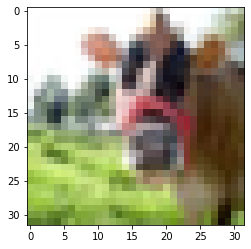

In [ ]:
img, label = dataset[0]
show_example(img, label)

Label:  rose (70)


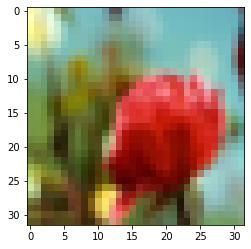

In [ ]:
show_example(*dataset[7500])

In [ ]:
random_seed = 43
torch.manual_seed(random_seed);

In [ ]:
val_size = 10000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
print('total images in our training set: ', len(train_ds))
print('total images in our validation set: ', len(val_ds))

total images in our training set:  40000
total images in our validation set:  10000


In [ ]:
# from torchvision.datasets import CIFAR100
dataset_url = 'https://www.cs.toronto.edu/~kriz/cifar.html'


In [ ]:
batch_size=128

In [ ]:
train_dl = DataLoader(train_ds, 
                      batch_size, 
                      shuffle=True, 
                      num_workers=4, 
                      pin_memory=True)

val_dl = DataLoader(val_ds, 
                    batch_size,       # note lesson on feedforward has the *2
                    num_workers=4, 
                    pin_memory=True)

test_dl = DataLoader(test_ds, 
                    batch_size,      # note lesson on feedforward has *2 batch_size
                    num_workers=4, 
                    pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]) 
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

In [ ]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]) 
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


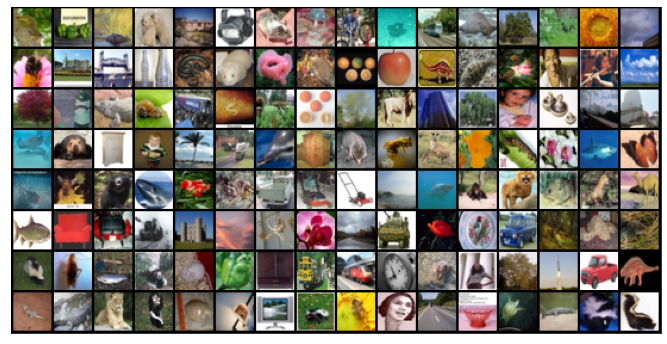

In [ ]:
show_batch(train_dl)

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
torch.cuda.set_device(0)

In [ ]:
!nvidia-smi

Sat Jul 24 10:57:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    29W /  70W |   1066MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
test_dl = DeviceDataLoader(test_dl, device)

In [ ]:
def plot_losses(history):
    losses = [x['val_loss'] for x in history]
    plt.plot(losses, '-x')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs');

In [ ]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [ ]:
input_size = 3*32*32      #3*32*32=3072
output_size = len(dataset.classes)
hidden_size1 = 1034 
hidden_size2 = 1034 

In [ ]:
class CIFAR100Model(ImageClassificationBase):     # feed forward
    def __init__(self):
        super().__init__()
        # hidden layers
        self.linear1a = nn.Linear(input_size, hidden_size1)
        self.linear1b = nn.Linear(hidden_size1, hidden_size2)
        self.linear2 = nn.Linear(hidden_size2, output_size)
        
    def forward(self, xb):
        # Flatten images into vectors
        xb = xb.view(xb.size(0), -1)

        # Apply hidden layers & activation functions
        out = self.linear1a(xb)
        out = F.relu(out)
        out = self.linear1b(out)
        out = F.relu(out)

        #apply output layer
        out = self.linear2(out)
        return out

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model_ff = to_device(CIFAR100Model(), device)

In [ ]:
history_ff = [evaluate(model_ff, val_dl)]
history_ff

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.009889240376651287, 'val_loss': 4.606130599975586}]

In [ ]:
history_ff += fit(30, 0.1, model_ff, train_dl, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 4.0665, val_acc: 0.0652
Epoch [1], val_loss: 3.8537, val_acc: 0.1079
Epoch [2], val_loss: 3.8948, val_acc: 0.0980
Epoch [3], val_loss: 3.6311, val_acc: 0.1458
Epoch [4], val_loss: 3.5535, val_acc: 0.1610
Epoch [5], val_loss: 3.5335, val_acc: 0.1581
Epoch [6], val_loss: 3.5656, val_acc: 0.1668
Epoch [7], val_loss: 3.5655, val_acc: 0.1582
Epoch [8], val_loss: 3.4911, val_acc: 0.1840
Epoch [9], val_loss: 3.3941, val_acc: 0.1868
Epoch [10], val_loss: 3.4566, val_acc: 0.1839
Epoch [11], val_loss: 3.2735, val_acc: 0.2218
Epoch [12], val_loss: 3.2648, val_acc: 0.2194
Epoch [13], val_loss: 3.3727, val_acc: 0.2080
Epoch [14], val_loss: 3.2006, val_acc: 0.2314
Epoch [15], val_loss: 3.3162, val_acc: 0.2195
Epoch [16], val_loss: 3.3243, val_acc: 0.2112
Epoch [17], val_loss: 3.3870, val_acc: 0.2063
Epoch [18], val_loss: 3.3017, val_acc: 0.2271
Epoch [19], val_loss: 3.2597, val_acc: 0.2285
Epoch [20], val_loss: 3.2826, val_acc: 0.2259
Epoch [21], val_loss: 3.2862, val_acc: 0.227

In [ ]:
history_ff += fit(20, 0.01, model_ff, train_dl, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.1552, val_acc: 0.2818
Epoch [1], val_loss: 3.1777, val_acc: 0.2825
Epoch [2], val_loss: 3.1776, val_acc: 0.2832
Epoch [3], val_loss: 3.1771, val_acc: 0.2841
Epoch [4], val_loss: 3.1886, val_acc: 0.2879
Epoch [5], val_loss: 3.1925, val_acc: 0.2864
Epoch [6], val_loss: 3.2000, val_acc: 0.2840
Epoch [7], val_loss: 3.1951, val_acc: 0.2838
Epoch [8], val_loss: 3.2016, val_acc: 0.2846
Epoch [9], val_loss: 3.2004, val_acc: 0.2866
Epoch [10], val_loss: 3.2063, val_acc: 0.2840
Epoch [11], val_loss: 3.2113, val_acc: 0.2855
Epoch [12], val_loss: 3.2178, val_acc: 0.2849
Epoch [13], val_loss: 3.2296, val_acc: 0.2822
Epoch [14], val_loss: 3.2273, val_acc: 0.2835
Epoch [15], val_loss: 3.2310, val_acc: 0.2834
Epoch [16], val_loss: 3.2291, val_acc: 0.2854
Epoch [17], val_loss: 3.2431, val_acc: 0.2820
Epoch [18], val_loss: 3.2426, val_acc: 0.2850
Epoch [19], val_loss: 3.2482, val_acc: 0.2825


In [ ]:
history_ff += fit(10, 0.001, model_ff, train_dl, val_dl)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.2381, val_acc: 0.2844
Epoch [1], val_loss: 3.2416, val_acc: 0.2860
Epoch [2], val_loss: 3.2422, val_acc: 0.2856
Epoch [3], val_loss: 3.2425, val_acc: 0.2849
Epoch [4], val_loss: 3.2436, val_acc: 0.2853
Epoch [5], val_loss: 3.2450, val_acc: 0.2856
Epoch [6], val_loss: 3.2457, val_acc: 0.2858
Epoch [7], val_loss: 3.2464, val_acc: 0.2857
Epoch [8], val_loss: 3.2478, val_acc: 0.2866
Epoch [9], val_loss: 3.2483, val_acc: 0.2861


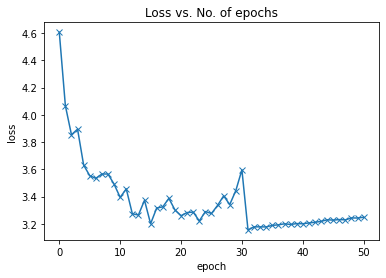

In [ ]:
plot_losses(history_ff)

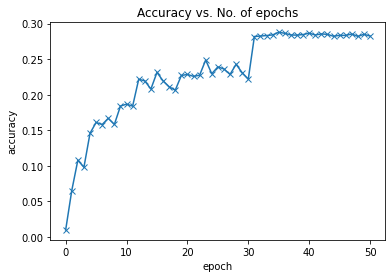

In [ ]:
plot_accuracies(history_ff)

In [ ]:
test_ff = evaluate(model_ff, test_dl)
test_ff

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.2913370132446289, 'val_loss': 3.240445613861084}

In [ ]:
test_ff = evaluate(model_ff, test_dl)
test_ff

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.2913370132446289, 'val_loss': 3.240445613861084}

In [ ]:
arch_ff = "4 layers (1034, 1034, 10)"
lrs_ff = [0.1, 0.01, 0.001]
epochs_ff = [30, 20, 10]

In [ ]:
test_acc_ff = 0.296281635761261
test_loss_ff = 3.228579521179199

In [ ]:
torch.save(model_ff.state_dict(), 'cifar100-feedforward.pth')

In [ ]:
class Cifar100CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # input: 3 x 32 x 32
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            # output: 32 x 32 x 32
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            # output: 64 x 32 x 32
            nn.ReLU(),
            # output: 64 x 32 x 32
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 100))
        
    def forward(self, xb):
        return self.network(xb)

In [ ]:
# the torch.no_grad only applies during the evaluate phase
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
model_cnn = to_device(Cifar100CnnModel(), device)
model_cnn

Cifar100CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_fea

In [ ]:
history_cnn = [evaluate(model_cnn, val_dl)]
history_cnn

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[{'val_acc': 0.009394778870046139, 'val_loss': 4.605522155761719}]

In [ ]:
num_epochs_cnn = 20
opt_func = torch.optim.Adam
lr_cnn = 0.001

In [ ]:
%%time
history_cnn = fit(num_epochs_cnn, lr_cnn, model_cnn, train_dl, val_dl, opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.8187, val_acc: 0.0971
Epoch [1], val_loss: 3.4670, val_acc: 0.1743
Epoch [2], val_loss: 3.1549, val_acc: 0.2253
Epoch [3], val_loss: 2.9611, val_acc: 0.2713
Epoch [4], val_loss: 2.7781, val_acc: 0.3060
Epoch [5], val_loss: 2.6900, val_acc: 0.3196
Epoch [6], val_loss: 2.5992, val_acc: 0.3459
Epoch [7], val_loss: 2.5564, val_acc: 0.3608
Epoch [8], val_loss: 2.6067, val_acc: 0.3703
Epoch [9], val_loss: 2.7155, val_acc: 0.3653
Epoch [10], val_loss: 2.8130, val_acc: 0.3679
Epoch [11], val_loss: 3.0707, val_acc: 0.3677
Epoch [12], val_loss: 3.3352, val_acc: 0.3551
Epoch [13], val_loss: 3.5654, val_acc: 0.3644
Epoch [14], val_loss: 3.9157, val_acc: 0.3528
Epoch [15], val_loss: 4.2988, val_acc: 0.3497
Epoch [16], val_loss: 4.6585, val_acc: 0.3459
Epoch [17], val_loss: 4.9906, val_acc: 0.3560
Epoch [18], val_loss: 5.4048, val_acc: 0.3528
Epoch [19], val_loss: 5.5229, val_acc: 0.3447
CPU times: user 2min 19s, sys: 1min 47s, total: 4min 6s
Wall time: 4min 22s


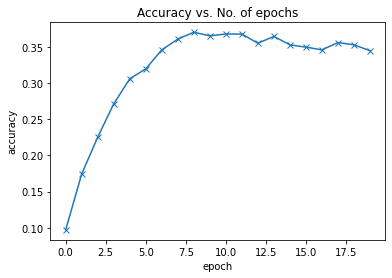

In [ ]:
plot_accuracies(history_cnn)

In [ ]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

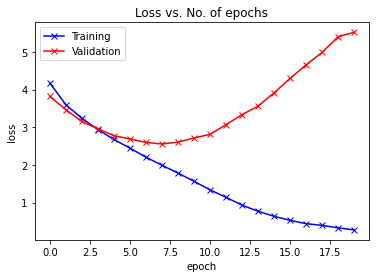

In [ ]:
plot_losses(history_cnn)

In [ ]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: lamp , Predicted: lamp


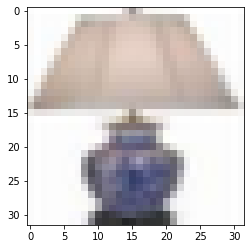

In [ ]:
img, label = test_ds[3002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_cnn))

Label: otter , Predicted: train


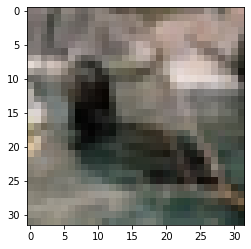

In [ ]:
img, label = test_ds[6090]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model_cnn))

In [ ]:
test_cnn = evaluate(model_cnn, test_dl) 
test_cnn

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.35729825496673584, 'val_loss': 5.410478591918945}

In [ ]:
test_dl = DeviceDataLoader(DataLoader(test_ds, batch_size*2), device)
result_cnn = evaluate(model_cnn, test_dl)
result_cnn

{'val_acc': 0.35673826932907104, 'val_loss': 5.411740779876709}

In [ ]:
torch.save(model_cnn.state_dict(), 'cifar100-cnn.pth')

In [ ]:
model_cnn = to_device(Cifar100CnnModel(), device)

In [ ]:
model_cnn.load_state_dict(torch.load('cifar100-cnn.pth'))

<All keys matched successfully>

In [ ]:
import torchvision.transforms as tt
# Data transforms (normalization & data augmentation)
#stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) - cifar10
stats = ((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))      #cifar100

train_tfms = tt.Compose([tt.RandomCrop(32, padding=4, padding_mode='reflect'), 
                         tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [ ]:
train_ds = CIFAR100(root = 'data/', download = True, transform = train_tfms)
valid_ds = CIFAR100(root = 'data/', train = False, transform = valid_tfms)

Files already downloaded and verified


In [ ]:
batch_size = 400

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # 3 x 32 x 32
        self.conv1 = conv_block(in_channels, 64)         # 64 x 32 x 32
        self.conv2 = conv_block(64, 128, pool=True)      # 128 x 16 x 16
        self.res1 = nn.Sequential(conv_block(128, 128), 
                                  conv_block(128, 128))  # 128 x 16 x 16
        
        self.conv3 = conv_block(128, 256, pool=True)    # 256 x 8 x 8
        self.conv4 = conv_block(256, 512, pool=True)    # 512 x 4 x 4
        self.res2 = nn.Sequential(conv_block(512, 512), 
                                  conv_block(512, 512))  # 512 x 4 x 4
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), # 512 x 1 x 1
                                        nn.Flatten(),     # 512
                                        nn.Dropout(0.2),  
                                        nn.Linear(512, num_classes)) # 100
        
    def forward(self, xb):
        out1 = self.conv1(xb)
        out2 = self.conv2(out1)
        out3 = self.res1(out2) + out2
        out4 = self.conv3(out3)
        out5 = self.conv4(out4)
        out6 = self.res2(out5) + out5
        out = self.classifier(out6)
        return out

In [ ]:
model_resnet9 = to_device(ResNet9(3, 100), device)
model_resnet9

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
# call model eval before doing any evaluation - good practice
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()      
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up custom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [ ]:
history_resnet9 = [evaluate(model_resnet9, valid_dl)]
history_resnet9

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.010961538180708885, 'val_loss': 4.608250617980957}]

In [ ]:
epochs = 50
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [ ]:
%%time
history_resnet9 += fit_one_cycle(epochs, max_lr, model_resnet9, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 3.3451, val_acc: 0.2010
Epoch [1], val_loss: 2.9397, val_acc: 0.2648
Epoch [2], val_loss: 2.5147, val_acc: 0.3529
Epoch [3], val_loss: 2.3721, val_acc: 0.3752
Epoch [4], val_loss: 2.1047, val_acc: 0.4566
Epoch [5], val_loss: 2.2760, val_acc: 0.4162
Epoch [6], val_loss: 2.2353, val_acc: 0.4377
Epoch [7], val_loss: 1.9010, val_acc: 0.4867
Epoch [8], val_loss: 2.0176, val_acc: 0.4680
Epoch [9], val_loss: 1.8089, val_acc: 0.5124
Epoch [10], val_loss: 1.7720, val_acc: 0.5307
Epoch [11], val_loss: 1.7787, val_acc: 0.5335
Epoch [12], val_loss: 1.8546, val_acc: 0.5105
Epoch [13], val_loss: 1.9015, val_acc: 0.5069
Epoch [14], val_loss: 1.8176, val_acc: 0.5211
Epoch [15], val_loss: 1.6758, val_acc: 0.5394
Epoch [16], val_loss: 1.6795, val_acc: 0.5482
Epoch [17], val_loss: 1.8240, val_acc: 0.5184
Epoch [18], val_loss: 1.6296, val_acc: 0.5532
Epoch [19], val_loss: 1.6352, val_acc: 0.5570
Epoch [20], val_loss: 1.6796, val_acc: 0.5470
Epoch [21], val_loss: 1.7756, val_acc: 0.538

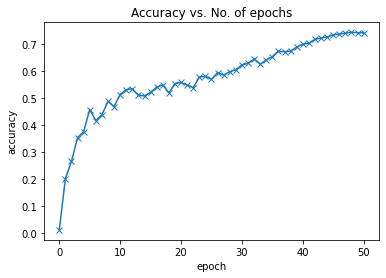

In [ ]:
plot_accuracies(history_resnet9)

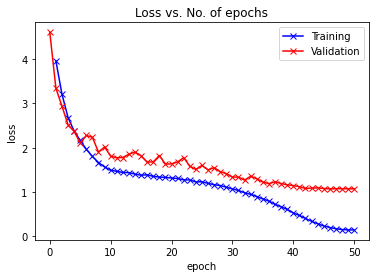

In [ ]:
plot_losses(history_resnet9)

In [ ]:
def plot_lrs(history_resnet9):
    lrs = np.concatenate([x.get('lrs', []) for x in history_resnet9])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

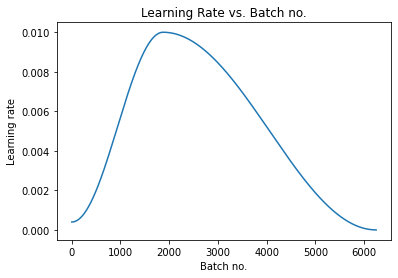

In [ ]:
plot_lrs(history_resnet9)

Label: mountain , Predicted: train


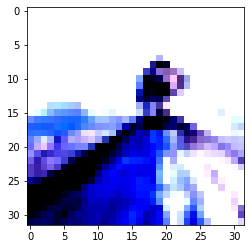

In [ ]:
img, label = valid_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model_resnet9))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: wardrobe , Predicted: wardrobe


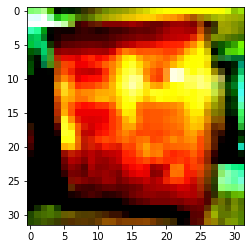

In [ ]:
img, label = valid_ds[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', valid_ds.classes[label], ', Predicted:', predict_image(img, model_resnet9))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: spider , Predicted: spider


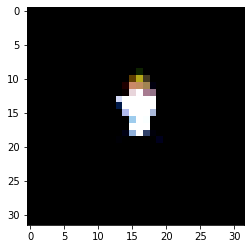

In [ ]:
img, label = valid_ds[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', train_ds.classes[label], ', Predicted:', predict_image(img, model_resnet9))

In [ ]:
torch.save(model_resnet9.state_dict(), 'cifar100-resnet9.pth')